# Climate portfolio post

Your turn!

## Pick a new location and/or measurement to plot
🌏 📈

Recreate the workflow you just did in a place that interests you OR with
a different measurement. You will need to make your own new Markdown and
Code cells below this one, or create a new notebook.

Your analysis should include:

1.  A researched (with citations or links) **site description**,
    including *why* you chose the site
2.  A researched (with citations or links) **data description**,
    including a **data citation**
3.  A researched (with citations or links) **methods overview**
4.  Some kind of **visual evidence** (plot, chart, diagram) for your
    results
5.  A **headline and description** for the visual evidence that
    *interprets* your analysis and puts it *in context*

You should also delete the instructions before submitting a portfolio page.

To submit your portfolio post, we're going to do something a little different this week, to see if it is easier:

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

Import libraries.

In [24]:
# Import required packages
import pandas as pd
import numpy as np
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

I initially picked Madison, WI, with data at
<https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1WIDA0063>.
However, it only has data from 2018.
Picking instead St Paul, MN, with data since 1938
<https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00014922>

In [37]:
MSP_URL = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TMIN,TMAX,PRCP&stations='
'USW00014922'
'&startDate=1893-01-01&endDate=2024-10-01&units=metric')
MSP_URL

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMIN,TMAX,PRCP&stations=USW00014922&startDate=1893-01-01&endDate=2024-10-01&units=metric'

In [38]:
# Import data into Python from NCEI API
MSP_data = pd.read_csv(
    MSP_URL,
    # define the index as Date
    index_col='DATE',
    # Indicate these data as time series type
    parse_dates=True,
    # Define missing values as NaN
    na_values=['NaN'])
MSP_data

,STATION,PRCP,TMAX,TMIN
DATE,,,,
1938-04-09,USW00014922,0.0,10.6,-1.7
1938-04-10,USW00014922,0.0,18.9,1.1
1938-04-11,USW00014922,0.0,17.2,6.1
1938-04-12,USW00014922,0.0,21.7,2.8
1938-04-13,USW00014922,0.0,25.6,7.8
...,...,...,...,...
2024-09-19,USW00014922,0.8,30.0,20.6
2024-09-20,USW00014922,0.0,27.8,16.7
2024-09-21,USW00014922,0.0,28.9,15.6


In [39]:
MSP_data.loc['2024-08-01':'2024-08-31']

,STATION,PRCP,TMAX,TMIN
DATE,,,,
2024-08-01,USW00014922,13.0,24.4,18.9
2024-08-02,USW00014922,0.0,32.8,18.9
2024-08-03,USW00014922,4.6,29.4,18.3
2024-08-04,USW00014922,0.0,28.9,21.1
2024-08-05,USW00014922,35.6,22.8,15.6
2024-08-06,USW00014922,0.0,25.6,13.3
2024-08-07,USW00014922,0.0,25.0,15.6
2024-08-08,USW00014922,0.0,22.2,15.0
2024-08-09,USW00014922,0.0,21.1,13.9


## Initial Plots

<Axes: title={'center': 'Precipitation over Time for St Paul, MN'}, xlabel='Date', ylabel='Precipitation (mm)'>

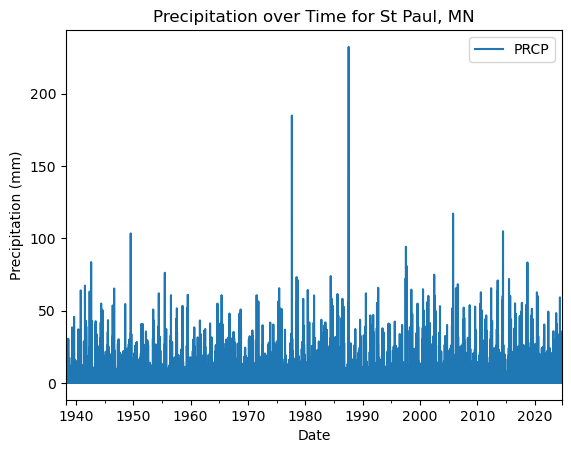

In [40]:
MSP_data.plot(
    y='PRCP',
    title='Precipitation over Time for St Paul, MN',
    xlabel='Date',
    ylabel='Precipitation (mm)')

<Axes: title={'center': 'Daily Max Temperature over Time for St Paul, MN'}, xlabel='Date', ylabel='Temperature (F)'>

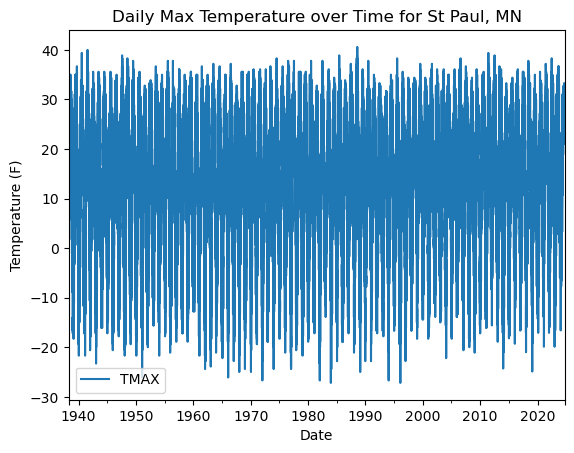

In [41]:
MSP_data.plot(
    y='TMAX',
    title='Daily Max Temperature over Time for St Paul, MN',
    xlabel='Date',
    ylabel='Temperature (F)')

## Annual Summaries

In [42]:
MSP_data = MSP_data[['PRCP', 'TMAX', 'TMIN']]
MSP_year = MSP_data.resample('YS').max()
MSP_year

,PRCP,TMAX,TMIN
DATE,,,
1938-01-01,30.7,35.0,23.3
1939-01-01,45.7,36.7,24.4
1940-01-01,64.0,39.4,24.4
1941-01-01,67.3,40.0,25.0
1942-01-01,83.6,35.6,26.1
...,...,...,...
2020-01-01,62.7,35.6,24.4
2021-01-01,40.4,37.2,25.6
2022-01-01,49.3,38.3,26.1


<Axes: title={'center': 'Annual Max Temperature over Time for St Paul, MN'}, xlabel='Date', ylabel='Temperature (C)'>

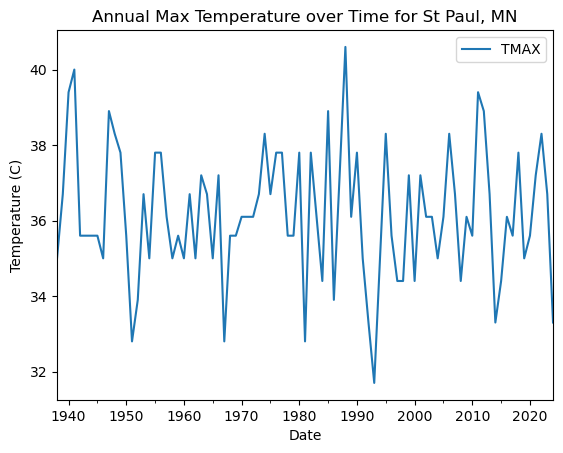

In [43]:
MSP_year.plot(
    y='TMAX',
    title='Annual Max Temperature over Time for St Paul, MN',
    xlabel='Date',
    ylabel='Temperature (C)')

In [46]:
# Extract date index and convert to year, then reshape
D = MSP_year.index
D = pd.to_numeric(D.year)
D = D.values.reshape(-1,1)

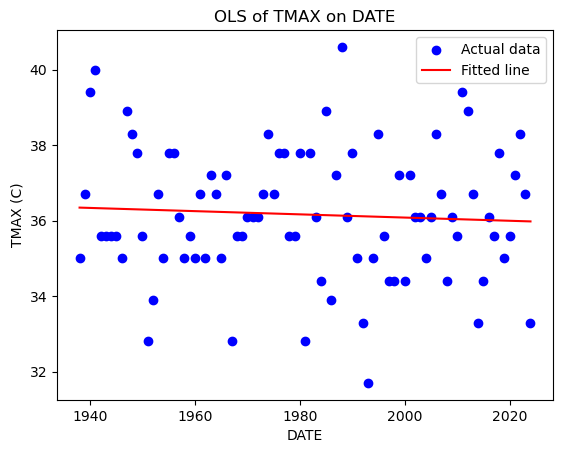

In [49]:
# Fit an OLS Linear Regression to using DATE index
# Create a linear regression model
model = LinearRegression()

T = MSP_year[['TMAX']]
# Fit the model
model.fit(D, T)

# Make predictions
T_pred = model.predict(D)

# Plot the results
plt.scatter(D, T, color='blue', label='Actual data')
plt.plot(D, T_pred, color='red', label='Fitted line')
plt.xlabel('DATE')
plt.ylabel('TMAX (C)')
plt.title('OLS of TMAX on DATE')
plt.legend()
plt.show()

This shows no appreciable trend.